# Analysis of PISA 2012 Data
## by Gabriela Sikora

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# Load in the cleaned csv that was created in the wrangle_pisa notebook
pisa = pd.read_csv('pisa_df.csv')

# Set up variables for colors to be used in plotting
color1 = '#a7d7c5'
color2 = '#74b49b'
color3 = '#5c8d89'
color_male = '#ff8162' 
color_female = '#ffcd60'
color_gends = ['#ffcd60', '#ff8162']
line = '#ff8000'

In [7]:
# Convert parental level of education into ordered categorical types
ordinal_var_dict = {'Education - Father': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent'],
                    'Education - Mother': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

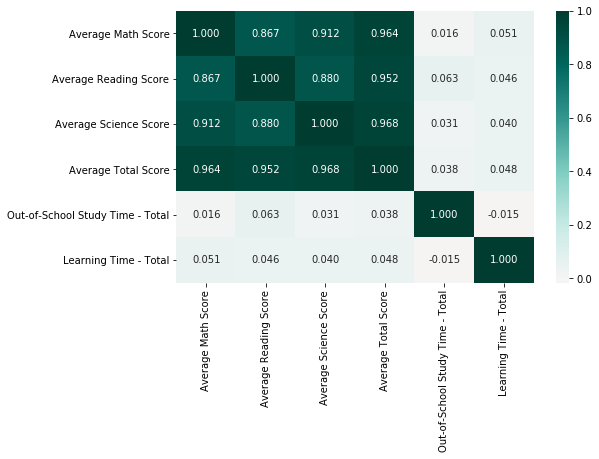

In [9]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 'Average Total Score', 'Out-of-School Study Time - Total', 'Learning Time - Total']

# Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

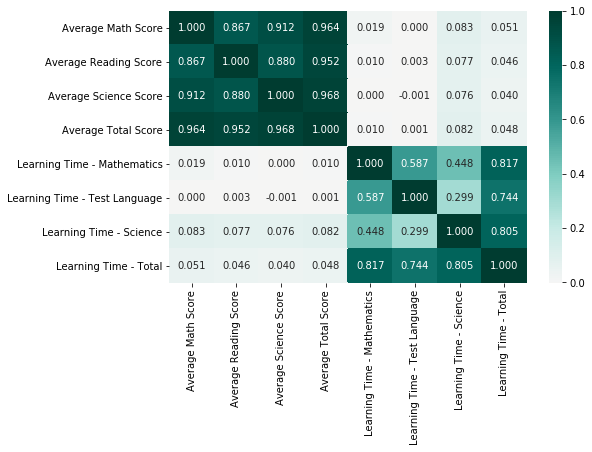

In [11]:
score_learn_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Learning Time - Mathematics',
                'Learning Time - Test Language', 'Learning Time - Science', 
                'Learning Time - Total']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[score_learn_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

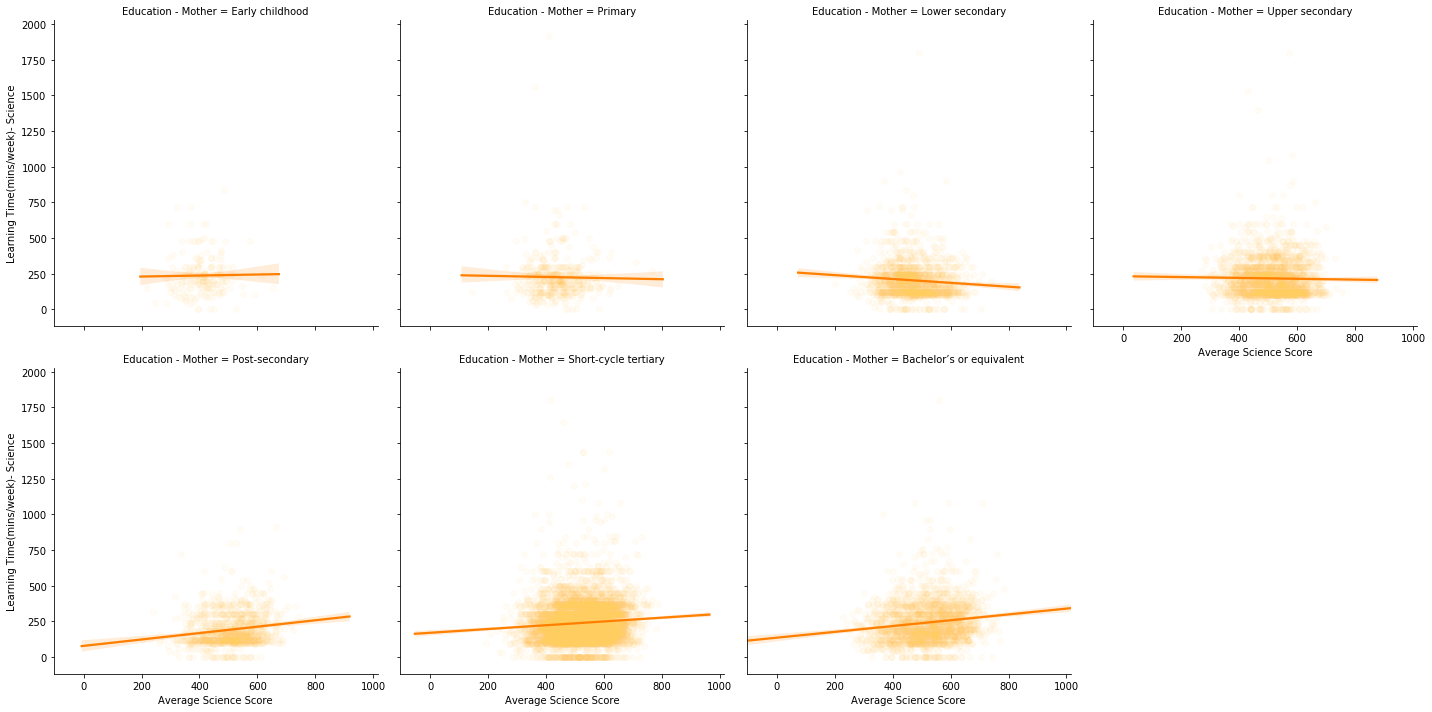

In [14]:
# Faceted scatter plots on levels of mother's education
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average Science Score', 'Learning Time - Science', color = color_female,  x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": line})
g.set_xlabels('Average Science Score')
g.set_ylabels('Learning Time(mins/week)- Science')

plt.show()

## (Visualization 4)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

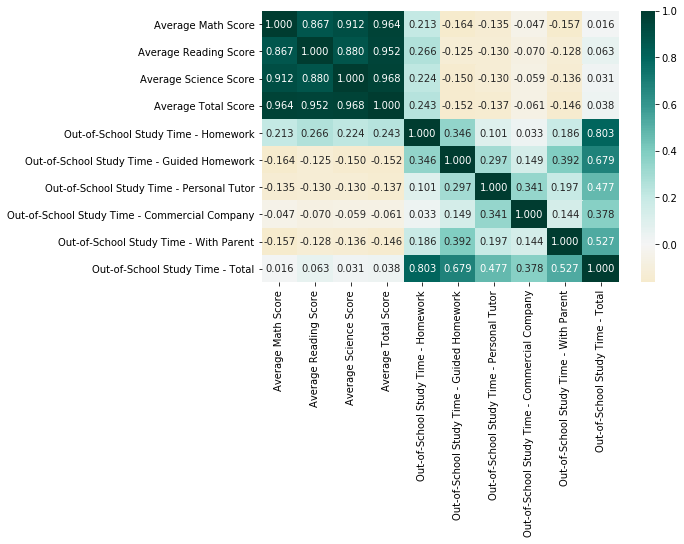

In [12]:
score_study_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent', 
                      'Out-of-School Study Time - Total']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[score_study_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

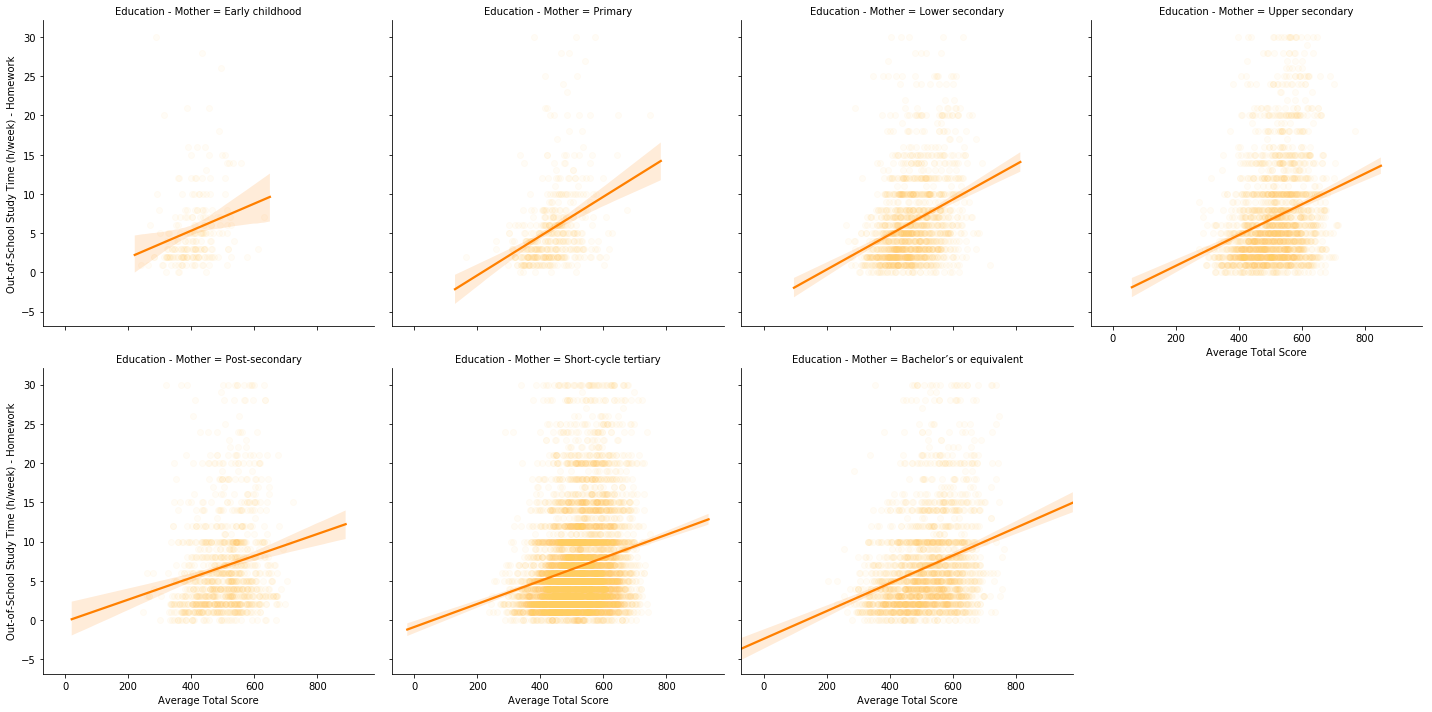

In [15]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Homework', color = color_female,
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": line})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')

plt.show()

## (Visualization 3)



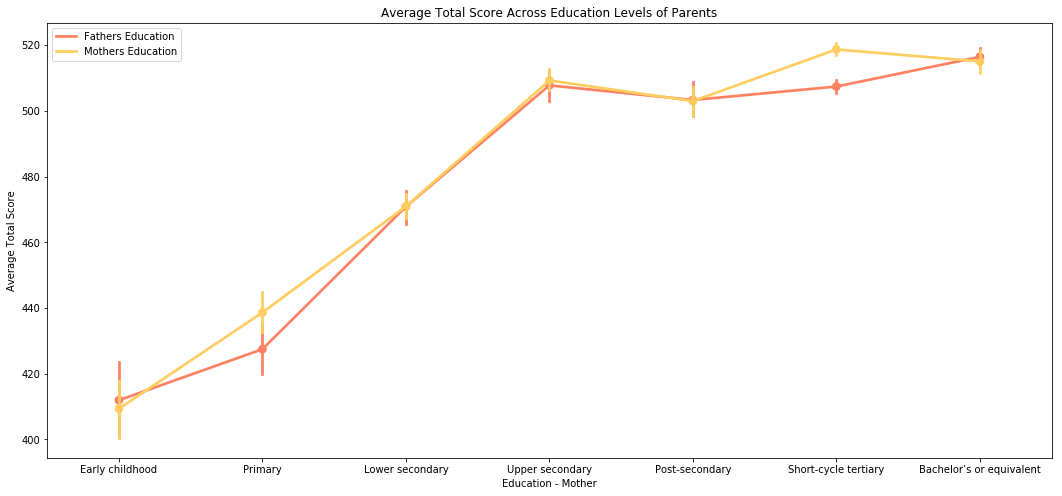

In [8]:
# Score averages of students vs education levels of Father
plt.figure(figsize=[18,8])
sb.pointplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
             color = color_male)

# Score averages of students vs education levels of Mother
sb.pointplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = color_female)

plt.title('Average Total Score Across Education Levels of Parents')

# Set legend
plt.legend(labels=['Fathers Education', 'Mothers Education'])
# https://stackoverflow.com/questions/23698850/manually-set-color-of-points-in-legend
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(color_male)
leg.legendHandles[1].set_color(color_female);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!